<img src="resources/Apple app Store.jpg" alt="apple store picture" width="900" height="400">

# **Apple AppStore Data Exploration**
**Complete Exploratory Data Analysis**\
Author : Mudasir Ali\
Dated : Feburary 2024\
Email : chmudasir9990@gmail.com

## **About Dataset**
Apple AppStore Android App Data (1.2 Million+ App Data) collected by the GAUTHAM PRAKASH in October 2021. Dataset collected with the help of Python script (Scrapy) running on a cluster of cloud vm instances. Dataset downloaded from (https://www.kaggle.com/datasets/gauthamp10/apple-appstore-apps/data)


# **Objective:**
The aim is to conduct Exploratory Data Analysis (EDA) to carefully examine the data for identifying patterns and extracting insights from it.


# **Tasks:**
1. Import necessary libraries.
2. Load the dataset.
3. Analyze and understand the dataset (spot anomalies, relationships, missing values, etc.).
4. Clean the data by addressing anomalies such as missing values.
5. Conduct feature engineering.
6. Extract insights from the data using various techniques.


# 1. **Import following libraries**
 - Panadas
 - Numpy
 - Matplotlib
 - Seaborn
 - Scipy
 - scikit learn

In [1]:
# Importing  the required  modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import scipy

Note: If you haven't installed these modules yet, please install them first using the following command (for Windows users). Mac users, please search for the relevant commands to install these modules.

**Command : pip install pandas numpy matplotlib seaborn scikit-learn scipy**

# 2. **Load the Dataset**

In [2]:
df = pd.read_csv('DataSets/appleAppData.csv')
# df = pd.read_csv('/kaggle/input/apple-appstore-apps/appleAppData.csv') # If you haven't already downloaded the dataset from Kaggle to your computer, use this line of code.

# 3. **Analyze the Data**

In [3]:
# Look first 5 records of data
df.head()

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,...,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,...,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,NaN,0.0,0,0.0,0
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,...,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,NaN,5.0,1,5.0,1
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296.0,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,...,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,NaN,0.0,0,0.0,0
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392.0,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,...,USD,False,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,NaN,0.0,0,0.0,0
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224.0,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,...,USD,True,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,http://imonstersoft.com,0.0,0,0.0,0


In [4]:
# To view detailed information about each column in the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230376 entries, 0 to 1230375
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   App_Id                   1230376 non-null  object 
 1   App_Name                 1230375 non-null  object 
 2   AppStore_Url             1230376 non-null  object 
 3   Primary_Genre            1230376 non-null  object 
 4   Content_Rating           1230376 non-null  object 
 5   Size_Bytes               1230152 non-null  float64
 6   Required_IOS_Version     1230376 non-null  object 
 7   Released                 1230373 non-null  object 
 8   Updated                  1230376 non-null  object 
 9   Version                  1230376 non-null  object 
 10  Price                    1229886 non-null  float64
 11  Currency                 1230376 non-null  object 
 12  Free                     1230376 non-null  bool   
 13  DeveloperId              1230376 non-null 

In [5]:
# Total rows and columns of data set
df.shape
print(f'Total rows of  dataset: {df.shape[0]}') 
print(f'Total columns of dataset: {df.shape[1]}')

Total rows of  dataset: 1230376
Total columns of dataset: 21


# **Key Observations part 1**
1. There are `06 numerical` (some of them seems continuous and discreet) and one is DeveloperId is not numerical data, it is ID(it will be considered as Nominal), `01 Boolean`, and `13 strings` (`02 are dates`) fields in the dataset
2. Total Rows of Dataset  : 1230376
3. Total Columns of Dataset : 21
4. The dates in the `Released` and `Updated` fields are in UTC format. To analyze them accurately, I need to convert them. The "T" doesn't have a specific meaning; it serves as the separator required by the ISO 8601 combined date-time format. The "Z" indicates the Zero timezone, meaning it's offset by 0 from Coordinated Universal Time (UTC).

---

In [6]:
# To look columns name
df.columns

Index(['App_Id', 'App_Name', 'AppStore_Url', 'Primary_Genre', 'Content_Rating',
       'Size_Bytes', 'Required_IOS_Version', 'Released', 'Updated', 'Version',
       'Price', 'Currency', 'Free', 'DeveloperId', 'Developer',
       'Developer_Url', 'Developer_Website', 'Average_User_Rating', 'Reviews',
       'Current_Version_Score', 'Current_Version_Reviews'],
      dtype='object')

In [7]:
# Statistical Summary
df.describe()

,Size_Bytes,Price,DeveloperId,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
count,1.230152e+06,1.229886e+06,1.230376e+06,1.230376e+06,1.230376e+06,1.230376e+06,1.230376e+06
mean,7.510857e+07,5.041264e-01,1.092869e+09,1.788387e+00,8.259478e+02,1.788387e+00,8.259478e+02
std,2.318726e+08,6.869674e+00,4.090897e+08,2.154105e+00,5.016051e+04,2.154105e+00,5.016051e+04
min,2.762800e+04,0.000000e+00,2.816565e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.041344e+07,0.000000e+00,7.381109e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.333158e+07,0.000000e+00,1.179711e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.365466e+07,0.000000e+00,1.471960e+09,4.333330e+00,3.000000e+00,4.333330e+00,3.000000e+00
max,7.677945e+10,9.999900e+02,1.590233e+09,5.000000e+00,2.268533e+07,5.000000e+00,2.268533e+07


In [8]:
# Identifying the null values
df.isnull().sum().sort_values(ascending = False)

Developer_Website          643988
Developer_Url                1109
Price                         490
Size_Bytes                    224
Released                        3
App_Name                        1
Free                            0
Current_Version_Score           0
Reviews                         0
Average_User_Rating             0
Developer                       0
DeveloperId                     0
App_Id                          0
Currency                        0
Version                         0
Updated                         0
Required_IOS_Version            0
Content_Rating                  0
Primary_Genre                   0
AppStore_Url                    0
Current_Version_Reviews         0
dtype: int64

In [9]:
# Total null values
print(f'Total number of null values are : {df.isnull().sum().sum()}')

Total number of null values are : 645815


In [10]:
# Check Duplicate Values
print(f'Number of duplicated values in dataset : {df.duplicated().sum()}')

Number of duplicated values in dataset : 0


# **Key Observations part 2**
1. `Price` : 75% of Apps has 0 Price means most Apps are free, we have to comprare it with column `Free` also
2. `Average_User_Rating` : 50% of Apps has 0 and maximum is 5 and ordinal column 
3. `Reviews` : 50% of Apps has 0 reviews maximum 2.268533e+07 reviews
4. `Current_Version_Score` : 50% of Apps has 0 and maximum is 5
5. `Current_Version_Reviews` : 50% of Apps has 0 and maximum is 2.268533e+07
6. `Size_Bytes` : To visualize properly, it is better to add new column with `Size_MB` 
7. `App_Name` : Only 01 null value (0.000081%), and will not impact much, if remove this one row
8. `Released` : Only 03 null value (0.000244%), and will not impact much, if remove 03 missing rows 
9. `Size_Bytes` : 224 null value (0.018206%), so can remove or impute missing rows after thorough analysis
10. `Price` : 490 null values (0.039825%), should analyze it properly with other column `Free` before handling Nan values
11. `Developer_Url` : 1109 null values (0.090135%), let it analyze further
12. `Developer_Website` : 643988 null values (52.340748%), as most of developers have no website, so can remove complete column, or let it be here.
13. `No duplicate rows`
14. Total null values : 645815

---

# 4. **Cleaning Data**

In [11]:
# checking null values
df[df.columns[df.isnull().any()]].isnull().sum().sort_values(ascending = False)

Developer_Website    643988
Developer_Url          1109
Price                   490
Size_Bytes              224
Released                  3
App_Name                  1
dtype: int64

Here `Developer_Website` and `Developer_Url` has distinct values means every developer has it's own credentials,
that's why we can't impute based on other's credentials. Here we will impute NaN values with  `No_Website` and `No_Url` respectively.

# Imputing `Developer_Website` and `Developer_Url`

In [12]:
# Imputing Developer_Website And Developer_Url column 
df['Developer_Website'] = df['Developer_Website'].fillna('No_Website')
df['Developer_Url'] = df['Developer_Url'].fillna('No_Url')

# Imputing `App_Name` 

In [13]:
# There is only one row of App_Name which has NaN value, so removed..
df.dropna(subset=['App_Name'], inplace=True)

# Imputing `Released` Column

In [ ]:
# There are 3 NaN values in Released column, imputed with Update column Values which is better way
df['Released'] = df['Released'].fillna(df['Updated'], inplace=True)

# Here `Size_Bytes` and `Price` will be imputed with KNN machine Algorithm. 

In [15]:
from sklearn.impute import KNNImputer

# Extracting Cols(Size_Bytes,Price) of NaN values
null_value_cols = ['Size_Bytes','Price']
data = df[null_value_cols]

#Creating Imputer and fit
imputer = KNNImputer(n_neighbors = 5)
imputed_data = imputer.fit_transform(data)

# Replacing imputed values with original values
df[['Size_Bytes','Price']]= imputed_data

In [16]:
print(f'Now the null values are : {df.isnull().sum().sum()}')

Now the null values are : 1230375


# **Milestone Achieved 🥰**
1. We delt with all missing values
2. Now, we have to analyze columns and have to look deeply in each column

# 5. **Feature Engineering**

# Updating `Released` and `Updated` Column

In [17]:
# Convert Released and Update Columns DateTime format to utc
df['Released'] = pd.to_datetime(df['Released'], utc = True)  
df['Updated'] = pd.to_datetime(df['Updated'], utc = True)  

# Modifying `Size_Byte` Column to `Size_MB`

In [18]:
# Changing values in `Size_Bytes` from Bytes to MBs and rename it as `Size_MB`.
df['Size_MB'] = (df['Size_Bytes'] / (1024*1024)).round(decimals = 2)

#Dropping `Size_Byte` column because we don't need of it.
df = df.drop(columns='Size_Bytes')

# **Drop one identical column**

In [19]:
df_ratings = df[df['Average_User_Rating'] == df['Current_Version_Score']]
df_reviews = df[df['Reviews'] == df['Current_Version_Reviews']]
print(f"Shape of original dataset {df.shape}")
print(f"Shape of dataset when 'Average_User_Rating' and 'Current_Version_Score' are equal {df_ratings.shape}")

print(f"Shape of dataset when 'Reviews' and 'Current_Version_Reviews' are equal {df_reviews.shape}")

Shape of original dataset (1230375, 21)
Shape of dataset when 'Average_User_Rating' and 'Current_Version_Score' are equal (1230374, 21)
Shape of dataset when 'Reviews' and 'Current_Version_Reviews' are equal (1230375, 21)


So: 

1. Descriptive Analysis of `Average_User_Rating` and `Current_Version_Score` are identical
2. Descriptive Analysis of `Reviews` and `Current_Version_Reviews` are identical

In [20]:
# That's why we drop one column from them
df = df.drop(columns = 'Current_Version_Score')
df = df.drop(columns = 'Current_Version_Reviews')

# Modifying the Column name `Free` to `Type`
And it's values from `True` to `Paid` and `False` to `Free`

In [21]:
# Change name of column from `Free` to `Type`
df.rename(columns={'Free':'Type'}, inplace=True)
# change type of `Type` column from bool to String
df['Type'] = df['Type'].astype(str)

# Changing values from 'True' and 'False' to 'Free' and 'Paid' in `Type` column as there are only 02 values
df['Type'] = df['Type'].replace({'True':'Free', 'False':'Paid'})


Create bins of `Content_Rating`column into proper Name convention for easy understanding

In [22]:
df.Content_Rating.value_counts()

Content_Rating
4+               980970
17+              124127
12+               89570
9+                35698
Not yet rated        10
Name: count, dtype: int64

In [23]:
df['Content_Rating'] = df['Content_Rating'].replace({'4+':'Kids', '9+':'Children', '12+':"Teen", '17+':'Adult', 'Not yet rated': 'Everyone'})
df.Content_Rating.value_counts()

Content_Rating
Kids        980970
Adult       124127
Teen         89570
Children     35698
Everyone        10
Name: count, dtype: int64

In [24]:
df.head()

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Required_IOS_Version,Released,Updated,Version,Price,Currency,Type,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Size_MB
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,Kids,8.0,NaT,2018-12-21 21:30:36+00:00,1.1.2,0.00,USD,Free,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,No_Website,0.0,0,20.97
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,Kids,10.0,NaT,2019-07-23 20:31:09+00:00,1.3,0.00,USD,Free,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,No_Website,5.0,1,12.53
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,Kids,9.0,NaT,2021-05-30 21:08:54+00:00,1.3.1,0.00,USD,Free,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,No_Website,0.0,0,20.93
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,Kids,8.0,NaT,2019-10-29 12:40:37+00:00,1.2,2.99,USD,Paid,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,No_Website,0.0,0,78.06
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,Kids,9.0,NaT,2020-12-18 21:36:11+00:00,1.0.1,0.00,USD,Free,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,http://imonstersoft.com,0.0,0,61.70


Now creating the bins of `Review` column and makes categories of reviews.

In [25]:
# making a new column called 'Reviews_category' which will have the category of the `Reviews`
bins = [-1, 0, 1_000, 10_000, 100_000, 1_000_000, 22_685_334]
labels=['no', 'Low', 'Moderate', 'High', 'Very High', 'Top Notch']
df['Reviews_category'] = pd.cut(df['Reviews'], bins=bins, labels=labels)

df.Reviews_category.value_counts()

Reviews_category
no           684320
Low          521883
Moderate      17148
High           5663
Very High      1209
Top Notch       152
Name: count, dtype: int64

Now creating the bins of `Average_User_Rating` column and makes new column`Rating_category` of Average_User_Rating and then drop the  original column. 

In [26]:
# making a new column called 'Rating_category' which will have the category of the `Average_User_Rating`
bins = [-1, 0, 1, 2, 3, 4, 5]
labels=['No Rating', 'Very Low' ,'Low', 'Satisfied', 'Good', 'Very Good']
df['Rating_category'] = pd.cut(df['Average_User_Rating'], bins=bins, labels=labels)
df['Rating_category'].unique()
df = df.drop(columns='Average_User_Rating')

# **Feature Engineering Milestone Achieved 😍**
1. We  have successfully implemented feature engineering techniques to improve the Exploratory Data Analysis.
2. The code is well-documented with detailed docstrings explaining each method and its functionality
2. Now, we will extract insights from our data using visualizations. 

# 6. **Extracting Insights**

1. What is the `correlation` between `numerical` columns (Reviews, Price and MB_Size)
2. What is the `distribution` of app categories (Primary_Genre) in the dataset?
3. `Top 5 categories` with the `highest Reviews`?
4. Which `top 5 categories` has the `highest` and `lowest average price`?
5. Which `top 5 categories` has the `highest average size in MBs`?
6. What is the `ratio` of `free` to `paid` apps in the dataset?
7. `Total percentage` of `free apps` in dataset?

**Q1: What is the correlation between numerical columns (`Reviews`, `Price` and `MB_Size`)**

In [27]:
from scipy.stats import pearsonr

# Calculate correlation between 'Price' and 'Reviews'
correlation, p_value = pearsonr(df['Price'], df['Reviews'])

print('Correlation between Price and Reviews:', correlation)
print('P-value:', p_value)
# Check if the correlation is statistically significant
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')

# Interpret the correlation coefficient
if correlation > 0:
    print('The correlation is positive, indicating that as the value of one variable increases, the value of the other variable also tends to increase.')
elif correlation < 0:
    print('The correlation is negative, indicating that as the value of one variable increases, the value of the other variable tends to decrease.')
else:
    print('The correlation is zero, indicating no linear relationship between the variables.')
print('-------------------------------------------------------------------------------')
# Calculate correlation between 'Price' and 'Size_MB'
correlation, p_value = pearsonr(df['Price'], df['Size_MB'])

print('Correlation between Price and Size_MB:', correlation)
print('P-value:', p_value)
# Check if the correlation is statistically significant
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')

# Interpret the correlation coefficient
if correlation > 0:
    print('The correlation is positive, indicating that as the value of one variable increases, the value of the other variable also tends to increase.')
elif correlation < 0:
    print('The correlation is negative, indicating that as the value of one variable increases, the value of the other variable tends to decrease.')
else:
    print('The correlation is zero, indicating no linear relationship between the variables.')

print('-------------------------------------------------------------------------------')
# Calculate correlation between 'Reviews' and 'Size_MB'
correlation, p_value = pearsonr(df['Reviews'], df['Size_MB'])

print('Correlation between Reviews and Size_MB:', correlation)
print('P-value:', p_value)
# Check if the correlation is statistically significant
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')

# Interpret the correlation coefficient
if correlation > 0:
    print('The correlation is positive, indicating that as the value of one variable increases, the value of the other variable also tends to increase.')
elif correlation < 0:
    print('The correlation is negative, indicating that as the value of one variable increases, the value of the other variable tends to decrease.')
else:
    print('The correlation is zero, indicating no linear relationship between the variables.')

Correlation between Price and Reviews: -0.0010878049152145638
P-value: 0.22757966243864436
The correlation is not statistically significant.
The correlation is negative, indicating that as the value of one variable increases, the value of the other variable tends to decrease.
-------------------------------------------------------------------------------
Correlation between Price and Size_MB: 0.05637432655836868
P-value: 0.0
The correlation is statistically significant.
The correlation is positive, indicating that as the value of one variable increases, the value of the other variable also tends to increase.
-------------------------------------------------------------------------------
Correlation between Reviews and Size_MB: 0.01124975741042349
P-value: 9.736041244582617e-36
The correlation is statistically significant.
The correlation is positive, indicating that as the value of one variable increases, the value of the other variable also tends to increase.


**Q2: What is the distribution of app categories (`Primary_Genre`) in the dataset?**

In [28]:
df['Primary_Genre'].value_counts().head()

Primary_Genre
Games        193749
Business     128297
Education    119174
Utilities     94007
Lifestyle     84565
Name: count, dtype: int64

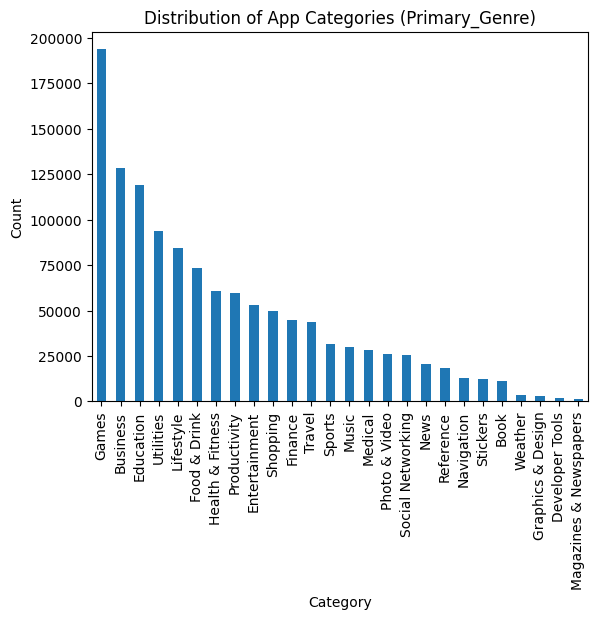

In [29]:

# Get the distribution of app categories (Primary_Genre)
category_distribution = df['Primary_Genre'].value_counts()

# Plot the category distribution
category_distribution.plot(kind='bar')
plt.title('Distribution of App Categories (Primary_Genre)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

**`Figure: 1` shows the distribution of app category wise**

**Insight: Top 3 categories that are installed from Apple store  are `Games`, `Business` and `Education`.**

**Q3 : `Top 5 categories` with the `highest Reviews`** 

In [30]:
# Calculate the average rating for each category
average_ratings = df.groupby('Primary_Genre')['Reviews'].mean()

# Sort the categories by average rating in descending order
sorted_ratings = average_ratings.sort_values(ascending=False)

# Select the top 5 categories
top_5_categories = sorted_ratings.head(5)

# Print the top 5 categories with their average ratings
print("Top 5 categories with the highest reviews:")
for category, rating in top_5_categories.items():
    print(f"- {category}: {rating:.2f}")

Top 5 categories with the highest reviews:
- Weather: 3147.31
- Photo & Video: 2957.38
- Finance: 2011.89
- Music: 1729.69
- Shopping: 1496.66


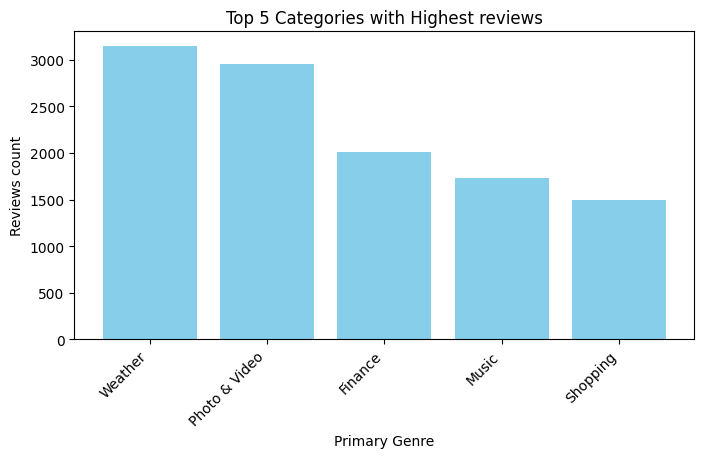

In [31]:
# Create a bar chart
plt.figure(figsize=(8, 4))
plt.bar(top_5_categories.index, top_5_categories.values, color='skyblue')
plt.xlabel('Primary Genre')
plt.ylabel('Reviews count')
plt.title('Top 5 Categories with Highest reviews')
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

# Show the plot
plt.show()

**`Figure: 2` shows top 5 Categories with Highest reviews**

Q**4 : Which `category` has the `highest average price` and `lowest average price`?**

In [32]:

# Calculate the average price for each category
average_prices = df.groupby('Primary_Genre')['Price'].mean()

# Find the categories with the highest and lowest average prices
highest_average_price_category = average_prices.idxmax()
lowest_average_price_category = average_prices.idxmin()

highest_average_price = average_prices.max()
lowest_average_price = average_prices.min()

print(f"The category with the highest average price is '{highest_average_price_category}' with an average price of ${highest_average_price:.2f}")
print(f"The category with the lowest average price is '{lowest_average_price_category}' with an average price of ${lowest_average_price:.2f}")

The category with the highest average price is 'Graphics & Design' with an average price of $6.98
The category with the lowest average price is 'Magazines & Newspapers' with an average price of $0.01


Q5 : **Which `top 5 categories` has the `highest average size in MBs`?**

In [33]:
# Calculate the average size in MBs for each category
average_size_per_category = df.groupby('Primary_Genre')['Size_MB'].mean()

# Sort the categories by average size in descending order
sorted_categories = average_size_per_category.sort_values(ascending=False)

# Print the top 5 categories with the highest average size in MBs
print(sorted_categories.head())
top5_categories = sorted_categories.head()

Primary_Genre
Graphics & Design    151.775595
Games                142.644873
Book                  86.477987
Education             80.241836
Music                 73.180097
Name: Size_MB, dtype: float64


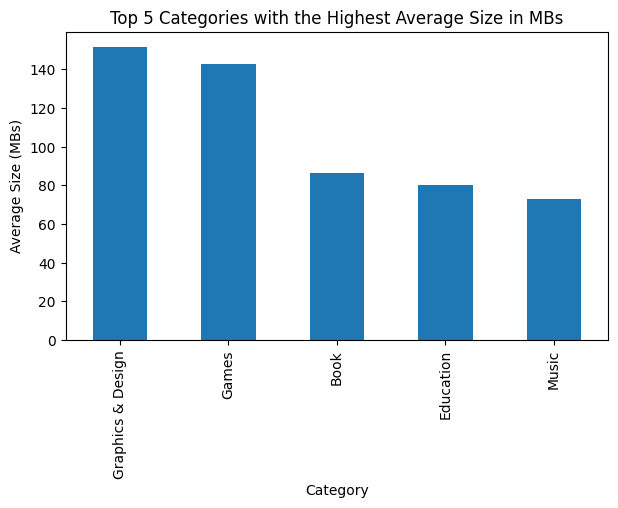

In [34]:
# Set the size of the plot
plt.figure(figsize=(7, 4))

# Create a bar plot of the top 5 categories with the highest average size in MBs
top5_categories.plot(kind='bar')

# Add a title and labels to the plot
plt.title('Top 5 Categories with the Highest Average Size in MBs')
plt.xlabel('Category')
plt.ylabel('Average Size (MBs)')

# Show the plot
plt.show()

**`Figure: 3` shows top 5 Categories with the Highest Average Size in MBs**

Q6 : **What is the ratio of free to paid apps in the dataset?**

In [35]:
# Count the number of free and paid apps
free_apps = df[df['Type'] == 'Free'].shape[0]
paid_apps = df[df['Type'] == 'Paid'].shape[0]

# Calculate the ratio
ratio = free_apps / paid_apps
print(f'The ratio of free to paid apps in the dataset is {ratio:.2f}')

The ratio of free to paid apps in the dataset is 10.95


Q7 : **What is the total percentage of free apps in the dataset?**

In [36]:
# Count the number of free and paid apps
free_apps = df[df['Type'] == 'Free'].shape[0]
paid_apps = df[df['Type'] == 'Paid'].shape[0]

# Calculate the percentage
percentage = (free_apps / (free_apps + paid_apps)) * 100

print(f'The total percentage of free apps in the dataset is {percentage:.2f}%')

The total percentage of free apps in the dataset is 91.63%


# **🎯Achievements🤩**

**1. Correlation Analysis:**
   - The correlation between `Price` and `Reviews` is not statistically significant.
   - The correlation between `Price` and `Size_MB` is statistically significant.
   - The correlation between `Reviews` and `Size_MB` is statistically significant.

**2. Distribution of App Categories (Primary_Genre):**
   - *Figure 1:* Top 3 categories that are installed from the Apple store are `Games`, `Business`, and `Education`.

**3. Top 5 Categories with the Highest Reviews:**
   - *Figure 2:* Top 5 Categories with the Highest Reviews are Weather, Photo & Videos, Finance, Music, and Shopping.

**4. Categories with the Highest and Lowest Average Price:**
   - The category with the highest average price is 'Graphics & Design' with an average price of $6.98.
   - The category with the lowest average price is 'Magazines & Newspapers' with an average price of $0.01.

**5. Top 5 Categories with the Highest Average Size in MBs:**
   - *Figure 3:* Top 5 Categories with the Highest Average Size in MBs are `Graphics & Design`, `Games`, `Book`, `Education`, and `Music`.

**6. Ratio of Free to Paid Apps:**
   - The ratio of free to paid apps in the dataset is 10.95.

**7. Total Percentage of Free Apps in Dataset:**
   - The total percentage of free apps in the dataset is 91.63%.


**1. Correlation Analysis:**
   - The correlation between `Price` and `Reviews` is not statistically significant.
   - The correlation between `Price` and `Size_MB` is statistically significant.
   - The correlation between `Reviews` and `Size_MB` is statistically significant.

**2. Distribution of App Categories (Primary_Genre):**
   - *Figure 1:* Top 3 categories that are installed from the Apple store are `Games`, `Business`, and `Education`.

**3. Top 5 Categories with the Highest Reviews:**
   - *Figure 2:* Top 5 Categories with the Highest Reviews are `Weather`, `Photo & Videos`, `Finance`, `Music`, and `Shopping`.

**4. Categories with the Highest and Lowest Average Price:**
   - The category with the highest average price is `Graphics & Design` with an average price of `$6.98`.
   - The category with the lowest average price is `Magazines & Newspapers` with an average price of `$0.01`.

**5. Top 5 Categories with the Highest Average Size in MBs:**
   - *Figure 3:* Top 5 Categories with the Highest Average Size in MBs are `Graphics & Design`, `Games`, `Book`, `Education`, and `Music`.

**6. Ratio of Free to Paid Apps:**
   - The ratio of free to paid apps in the dataset is `10.95`.

**7. Total Percentage of Free Apps in Dataset:**
   - The total percentage of free apps in the dataset is `91.63%`.


# **Credits:** **🦸‍♂️ Mudasir Ali**
**Contact:** \
Email: chmudasir9990@gmail.com\
LinkedIn: https://www.linkedin.com/in/mudasir-ali-0bb999246?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app\
GitHub : https://github.com/mudasir8187\
What's app: 03106248187